## Importando bibliotecas

In [1]:
# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas iniciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Inspeção Inicial dos dados

Os dados deste dataset foram preparados neste mesmo repositório do GitHub, em um notebook nomeado `Dataset.jpynb` , onde foram concatenados cerca de cinco datasets com avaliações de restaurantes em diferentes países.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CSVs/restaurantes.csv')
df = pd.DataFrame(data)

In [3]:
print(f"\n↳ Quantidade de linhas: {df.shape[0]}")
print(f"↳ Quantidade de colunas: {df.shape[1]}\n")
df.head(3)


↳ Quantidade de linhas: 2299006
↳ Quantidade de colunas: 13



,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Chalito_Rambla,1,Negative,review_774086112,Terrible food Terrible service,"Ok, this place is terrible! Came here bc we’ve...","Ok, this place is terrible! Came here bc we’ve...","October 12, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Chalito_Rambla,5,Positive,review_739142140,The best milanesa in central Barcelona,This place was a great surprise. The food is d...,This place was a great surprise. The food is d...,"January 14, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Chalito_Rambla,5,Positive,review_749758638,Family bonding,The food is excellent.....the ambiance is very...,The food is excellent.....the ambiance is very...,"March 7, 2020",Barcelona_Catalonia,https://www.tripadvisor.com/Restaurant_Review-...,UID_2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299006 entries, 0 to 2299005
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       object
 1   parse_count      object
 2   restaurant_name  object
 3   rating_review    object
 4   sample           object
 5   review_id        object
 6   title_review     object
 7   review_preview   object
 8   review_full      object
 9   date             object
 10  city             object
 11  url_restaurant   object
 12  author_id        object
dtypes: object(13)
memory usage: 228.0+ MB


## Limpeza, Manipulação e Preparação

Para este projeto, irei precisar apenas de algumas colunas desse dataset, sendo elas:

- `rating_review` é utilizada para analisar a pontuação do usuário, de `1` à `5` (do pior para o melhor).
- `sample` é a coluna que contém uma avaliação de sentimento do comentário, sendo ela `Negative` ou `Positive` .
- `review_full` contém o comentário completo dos usuário em relação ao restaurante, todos eles estão em inglês.

**Objetivos Iniciais**
- Criar um novo DataFrame com as 3 tabelas citadas acima, renomeando-as para se encaixar melhor ao propósito deste projeto.
- Identificar se existe um desbalanceamento na quantidade de avaliações positivas e negativas.
- Estudar o impacto das pontuações de `1` à `5` e estudar possibilidade de classificar um novo sentimento como `Neutral` .


In [5]:
# Preparando novo dataframe com as colunas 'rating_review', 'sample' e 'review_full'
df_pln = df[['rating_review', 'sample', 'review_full']]

# Renomenado colunas
df_pln = df_pln.rename(columns={'rating_review': 'ratings', 'sample': 'sentiments', 'review_full': 'reviews'})

df_pln.head()

,ratings,sentiments,reviews
0,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,5,Positive,This place was a great surprise. The food is d...
2,5,Positive,The food is excellent.....the ambiance is very...
3,5,Positive,"The food is execellent ,affortable price for p..."
4,5,Positive,"Mr Suarez,The food at your restaurant was abso..."


In [6]:
# Contagem de valores categóricos
df_categ = df_pln.groupby(['ratings', 'sentiments']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_categ

,ratings,sentiments,Count
4,5,Positive,967675
3,4,Positive,463400
2,3,Negative,195109
14,5.0,Positive,152572
13,5,Positive,136330
0,1,Negative,75039
1,2,Negative,73495
11,4,Positive,70712
12,4.0,Positive,67053
9,3,Negative,39131


In [7]:
# Removendo contagens menor ou igual a 2
df_categ = df_categ[df_categ['Count'] > 2]

# Transformando a coluna 'rating' em float
df_categ['ratings'] = df_categ['ratings'].astype(float)

# Agregando a coluna em rating
df_rating = df_categ.groupby(['ratings', 'sentiments']).agg({'Count': 'sum'}).reset_index()
df_rating.sort_values(by='ratings', ascending=False)

,ratings,sentiments,Count
4,5.0,Positive,1256577
3,4.0,Positive,601165
2,3.0,Negative,257145
1,2.0,Negative,92307
0,1.0,Negative,91793


In [14]:
# Preparando variáveis para plotagem
positive_count = df_rating.loc[df_rating['sentiments'] == 'Positive', 'Count'].values[0]
negative_count = df_rating.loc[df_rating['sentiments'] == 'Negative', 'Count'].values[0]

# Cores para os plots
cores = ['#d62828', '#ff9e00', '#eeef20', '#aacc00', '#55a630']

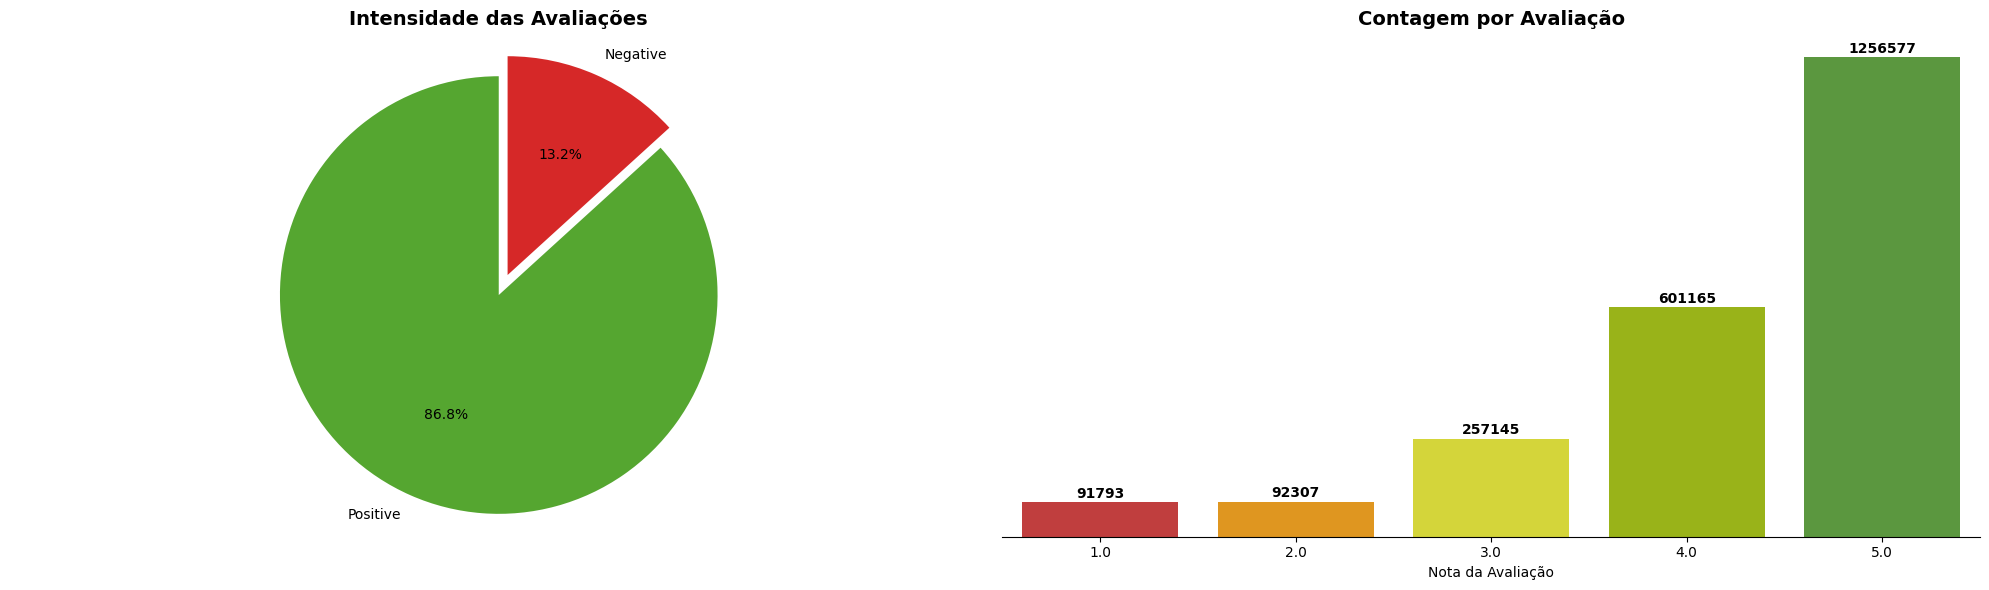

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

#------------------
# Primeiro subplot: Gráfico de pizza (intensidade)
#------------------
axes[0].pie([positive_count, negative_count],
            labels=['Positive', 'Negative'],
            colors= [cores[4], cores[0]],
            autopct='%1.1f%%',
            startangle=90,
            explode=(0.1, 0))

axes[0].set_title('Intensidade das Avaliações', fontsize=14, fontweight='bold')
axes[0].axis('equal')

#------------------
# Segundo subplot: Gráfico de barras (contagem)
#------------------
ax = sns.barplot(x=df_rating['ratings'],
                 y=df_rating['Count'],
                 palette=cores, ax=axes[1])

for i in range(len(df_rating['ratings'])):
    axes[1].annotate(f'{df_rating["Count"][i]:.0f}'.replace('.', ','),
                (i, df_rating['Count'][i]),
                ha="center",
                xytext=(0, 3),
                textcoords="offset points",
                fontweight='bold')

# Ocultando eixos e algumas bordas
axes[1].yaxis.set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["left"].set_visible(False)
axes[1].spines["right"].set_visible(False)

axes[1].set_title('Contagem por Avaliação', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nota da Avaliação')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

Existe um grande desbalanceamento das avaliações

In [17]:
df_rating = df_rating.drop('Count', axis=1)
df_rating = df_rating.reset_index(drop=True)
df_pln = df_pln.reset_index(drop=True)

df_pln = pd.merge(df_rating, df_pln[['ratings', 'sentiments', 'reviews']], on=['ratings', 'sentiments'], how='left')
df_pln['ratings'] = df_pln['ratings'].astype(int)

In [18]:
df_pln.head(3)

,ratings,sentiments,reviews
0,1,Negative,"Ok, this place is terrible! Came here bc we’ve..."
1,1,Negative,I always enjoyed above the average-to-outstand...
2,1,Negative,second visit there and i am very disapointed t...


In [19]:
# Porcentagem de valores faltantes
percentage_missing = ((df_pln.isnull().sum() / df_pln.shape[0]) * 100).sort_values(ascending=False)
print(f"Porcentagem de valores ausentes:\n{percentage_missing.apply(lambda x: f'{x:.2f}')}")

Porcentagem de valores ausentes:
reviews       1.93
ratings       0.00
sentiments    0.00
dtype: object


In [20]:
# Observando os valores ausentes
df_pln[df_pln['reviews'].isnull()].head()

,ratings,sentiments,reviews
265449,3,Negative,NaN
265450,3,Negative,NaN
265451,3,Negative,NaN
265452,3,Negative,NaN
265453,3,Negative,NaN


In [21]:
# Dropando valores ausentes
df_pln = df_pln.dropna()
print(f"Quantidade de valores ausentes:\n{df_pln.isna().sum()}")

Quantidade de valores ausentes:
ratings       0
sentiments    0
reviews       0
dtype: int64


In [22]:
nota_3 = df_pln[df_pln['ratings'] == 3]
for i, review in enumerate(nota_3.iloc[0:5, :]['reviews'], start=1):
    print(f"{i} ► {review}\n")

1 ► We went there for dinner further a friend’s recommendation. The menu is pretty large, the service was a bit disappointing, when we asked few recommendations to the waiter about the wine for instance, you need to push to have some advises. The food was acceptable, we had a carpaccio of octopus as a starter which was a bit disappointing too (couldn’t feel properly the taste of the octopus). Regarding the pizza they were very yummy.

2 ► Um, how this joint has this many 5 star reviews will FOREVER vex me. Dramatic presentation, for sure, but the execution was spotty at best for such an extremely focused menu. Will not return.

3 ► I am so confused by the positive reviews of the food. This is just not good Spanish food. Our drinks were great, but the suckling pig was dry and tough. We ate none of it because it was so bad. We had the spring rolls, which were good and a few other items. The server not very friendly. The place was packed, I assume from the great reviews, but it is really 